In [15]:
using ArgParse; # Argument parsing
using JLD;

# Visualization packages
using DataFrames;
using Plots;

using Statistics;

In [16]:
function meanpositives(mat::Matrix)
    nc = size(mat,1)
    sums = zeros(nc)
    counts = zeros(nc)
    for c in 1:nc
        for r in 1:size(mat,2)
            v = mat[c,r]
            if v > 0
                sums[c] += v
                counts[c] += 1.0
            end
        end
    end
    Float64[(counts[i]>0 ? sums[i]/counts[i] : 0.0) for i in 1:nc]
end

meanpositives (generic function with 1 method)

In [17]:
function stdpositives(mat::Matrix, means::Vector)
    nc = size(mat,1)
    sums = zeros(nc)
    counts = zeros(nc)
    for c in 1:nc
        for r in 1:size(mat,2)
            v = mat[c,r]
            if v > 0
                sums[c] += (v-means[c])^2
                counts[c] += 1.0
            end
        end
    end

    Float64[(counts[i]>0 ? sqrt(sums[i]/counts[i]) : 0.0) for i in 1:nc]
end

stdpositives (generic function with 1 method)

In [18]:
function processAllCell!(allCells, cellMatrix50, cellMatrixC, cellMatrixM)
    for i in 1:lastindex(allCells)
        # print(size(allCells[i].Np50p50)[1])
        if size(allCells[i].cMyc)[1] >= 721
            # viableCells += 1;
            push!(cellMatrix50, allCells[i].WTcRel[1:721]); #Np50p50
            push!(cellMatrixC, allCells[i].NcRel[1:721]);
            push!(cellMatrixM, allCells[i].cMyc[1:721]);
        end
    end
end

processAllCell! (generic function with 1 method)

In [19]:
home_dir = "/Users/helenhuang/Downloads/";
out_dir = "/Users/helenhuang/Downloads/";

WT_file = "cells_cRelAbundance_WTF6.jld"; # with IFFL
KO_file = "cells_cRelAbundance_KOF6.jld"; # with IFFL
WTn_file = "cells_cRelAbundance_WTF6n.jld"; # Direct, no IFFL
KOn_file = "cells_cRelAbundance_KOF6n.jld"; # Direct, no IFFL

┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


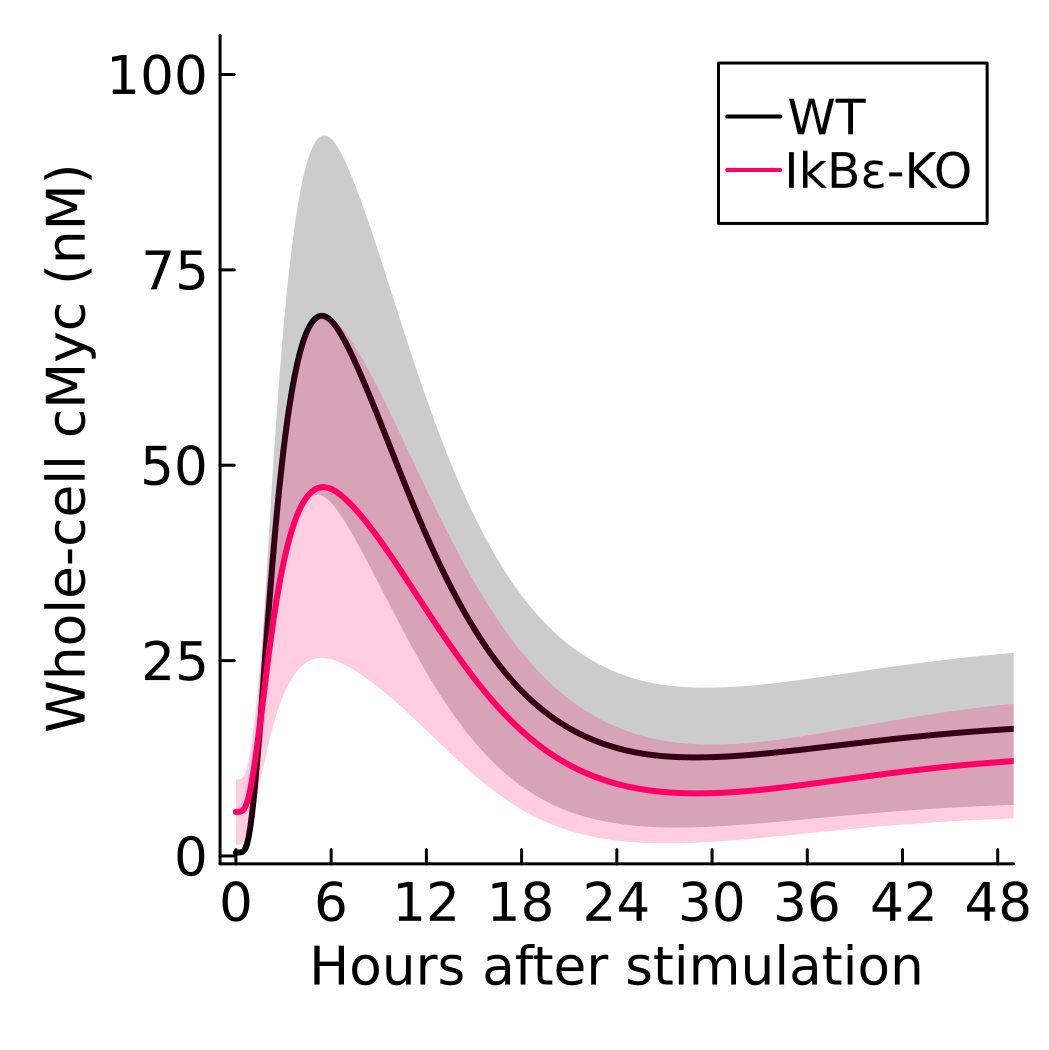

In [20]:
# process WT cells
cells_fn = string(home_dir, WT_file);
WTcellMatrix50 = Vector{Float64}[]; # Np50p50
WTcellMatrixC = Vector{Float64}[]; # nuclear cRel
WTcellMatrixM = Vector{Float64}[]; # nuclear cMyc

allCells = load(cells_fn, "allCells");
processAllCell!(allCells, WTcellMatrix50, WTcellMatrixC, WTcellMatrixM);
WTcellMatrixM = reduce(hcat, WTcellMatrixM);
meanCellsM = meanpositives(WTcellMatrixM);
stdCellsM = stdpositives(WTcellMatrixM, meanCellsM);
plotCellsM = Plots.plot([0:0.1:72.0;], meanCellsM, c=RGB(0/255, 0/255, 0/255), size=(500,350), xlabel="Hours after stimulation", ylabel="Whole-cell cMyc (nM)",grid=false, xlim=(-1.0, 73.0), xticks = ([0:12:72;]), label = "WT", ribbon=stdCellsM, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=false)

# process EKO cells
cells_fn = string(home_dir, KO_file);
KOcellMatrix50 = Vector{Float64}[]; # Np50p50
KOcellMatrixC = Vector{Float64}[]; # nuclear cRel
KOcellMatrixM = Vector{Float64}[]; # nuclear cMyc

allCells = load(cells_fn, "allCells");
processAllCell!(allCells, KOcellMatrix50, KOcellMatrixC, KOcellMatrixM);
KOcellMatrixM = reduce(hcat, KOcellMatrixM);
meanCellsM = meanpositives(KOcellMatrixM);
stdCellsM = stdpositives(KOcellMatrixM, meanCellsM)

Plots.plot!(plotCellsM, [0:0.1:72.0;], meanCellsM, c=RGB(255/255, 0/255, 102/255), size=(350,350), xlabel="Hours after stimulation", ylabel="Whole-cell cMyc (nM)",grid=false, xlim=(-1.0, 49.0), ylim=(-1.0, 105.0), xticks = ([0:6:48;]), label = "IkBε-KO", ribbon=stdCellsM, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=true)

┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


┌ Warning: type Cell not present in workspace; interpreting array as Array{Any}
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/JLD.jl:515
┌ Warning: type Cell not present in workspace; reconstructing
└ @ JLD /Users/helenhuang/.julia/packages/JLD/S6t6A/src/jld_types.jl:697


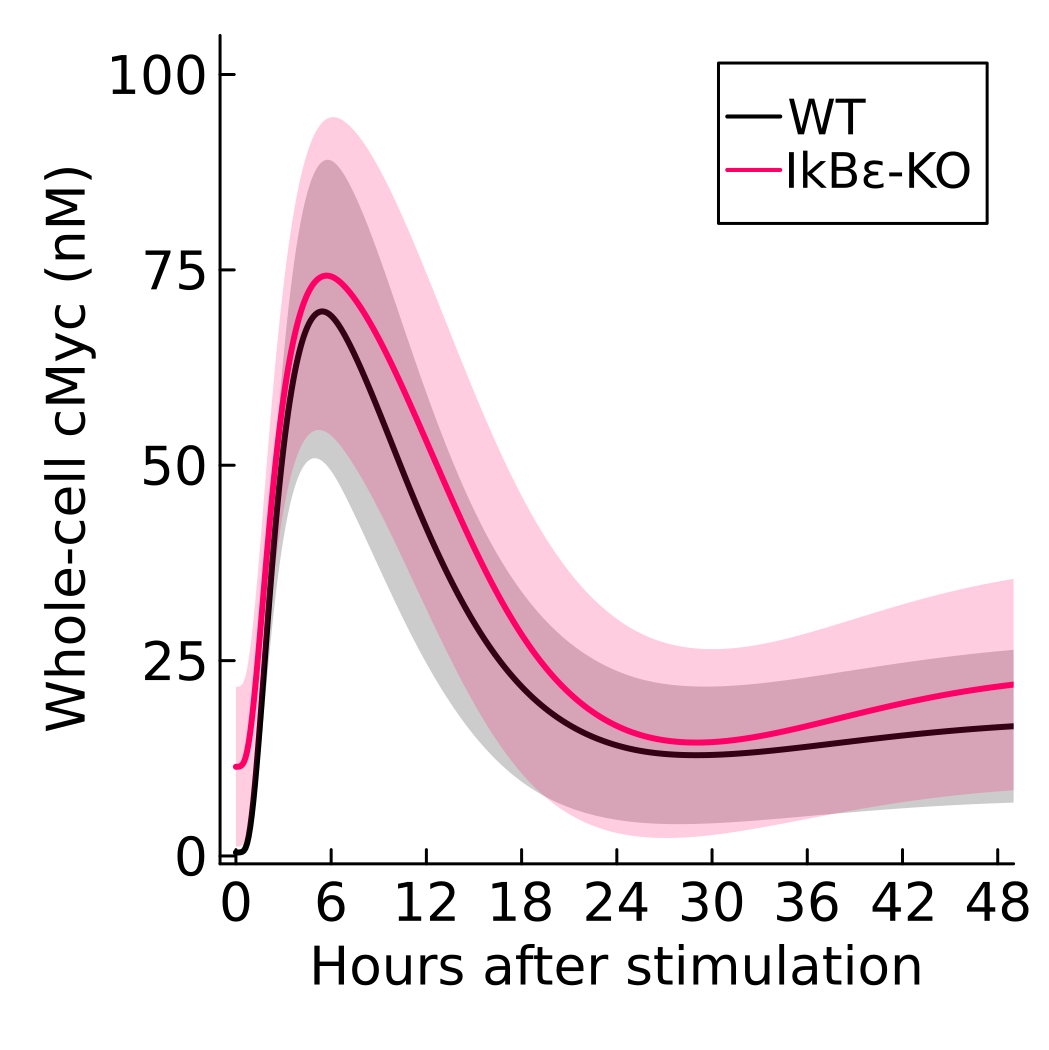

In [21]:
# process WT cells
cells_fn = string(home_dir, WTn_file);
WTcellMatrix50 = Vector{Float64}[]; # Np50p50
WTcellMatrixC = Vector{Float64}[]; # nuclear cRel
WTcellMatrixM = Vector{Float64}[]; # nuclear cMyc

allCells = load(cells_fn, "allCells");
processAllCell!(allCells, WTcellMatrix50, WTcellMatrixC, WTcellMatrixM);
WTcellMatrixM = reduce(hcat, WTcellMatrixM);
meanCellsM = meanpositives(WTcellMatrixM);
stdCellsM = stdpositives(WTcellMatrixM, meanCellsM);
plotCellsMn = Plots.plot([0:0.1:72.0;], meanCellsM, c=RGB(0/255, 0/255, 0/255), size=(500,350), xlabel="Hours after stimulation", ylabel="Whole-cell cMyc (nM)",grid=false, xlim=(-1.0, 73.0), xticks = ([0:12:72;]), label = "WT", ribbon=stdCellsM, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=false)

# process EKO cells
cells_fn = string(home_dir, KOn_file);
KOcellMatrix50 = Vector{Float64}[]; # Np50p50
KOcellMatrixC = Vector{Float64}[]; # nuclear cRel
KOcellMatrixM = Vector{Float64}[]; # nuclear cMyc

allCells = load(cells_fn, "allCells");
processAllCell!(allCells, KOcellMatrix50, KOcellMatrixC, KOcellMatrixM);
KOcellMatrixM = reduce(hcat, KOcellMatrixM);
meanCellsM = meanpositives(KOcellMatrixM);
stdCellsM = stdpositives(KOcellMatrixM, meanCellsM)

Plots.plot!(plotCellsMn, [0:0.1:72.0;], meanCellsM, c=RGB(255/255, 0/255, 102/255), size=(350,350), xlabel="Hours after stimulation", ylabel="Whole-cell cMyc (nM)",grid=false, xlim=(-1.0, 49.0), ylim=(-1.0, 105.0), xticks = ([0:6:48;]), label = "IkBε-KO", ribbon=stdCellsM, fillalpha=.2, lw = 2, dpi=300, legendfontsize=11, guidefontsize=12, tickfontsize=12, legend=true)

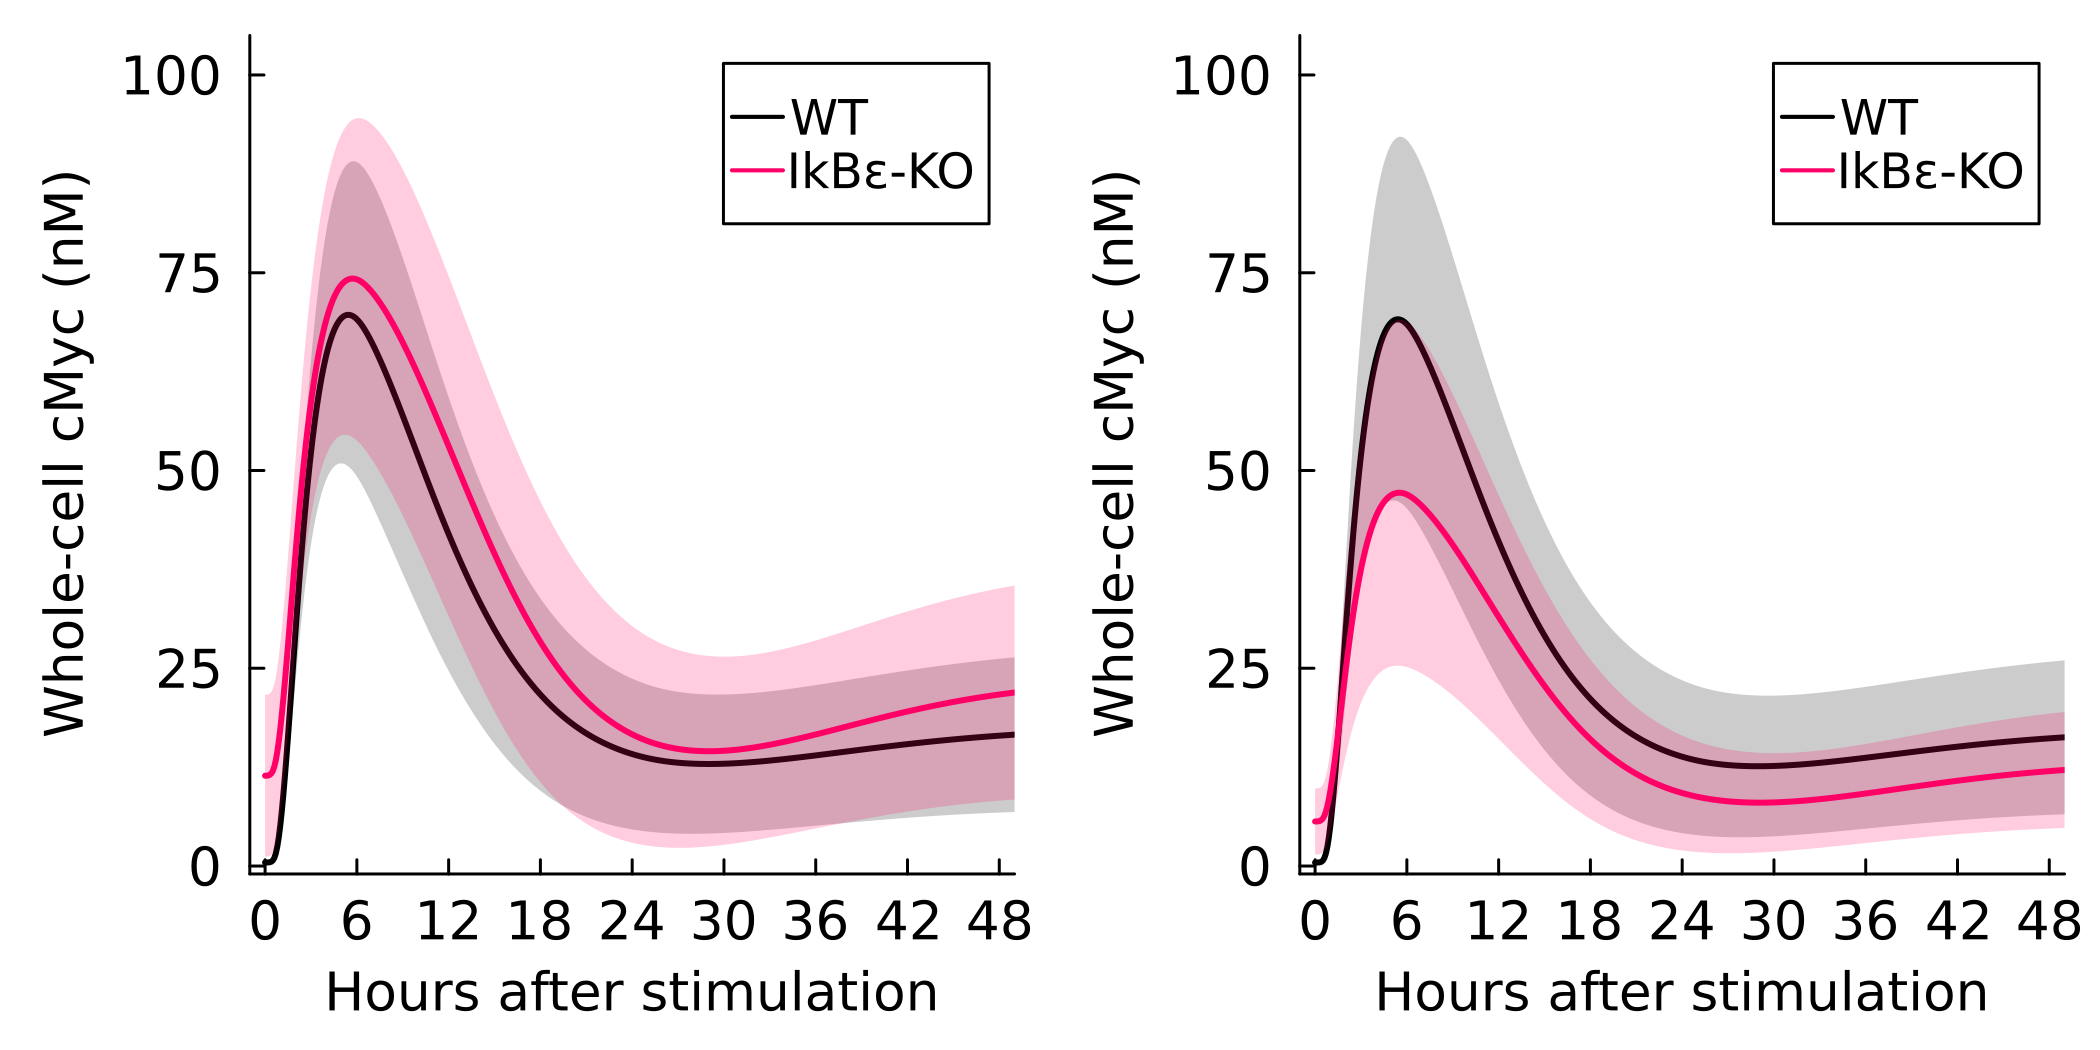

In [22]:
Plots.plot!(plotCellsMn, plotCellsM, layout = (1, 2), size=(700,350), left_margin=20Plots.px, bottom_margin=20Plots.px, dpi=300)

In [23]:
savefig(string(out_dir, "Myc_trajectory_IFFL.png"))